<div style="border: 3px solid #007acc; border-radius: 10px; padding: 15px; margin-bottom: 20px;">
  <h1 style="text-align: center; color: #333;">A Detailed Evolution of Football Statistics</h1>
  <h2 style="text-align: center; color: #333;">Fall 2024 Data Science Project</h2>
  <h3 style="text-align: center; color: #333;"><strong>Group Members: Sohum Belhe, Ansh Tyagi, Kabir Grover, Aadit Shah</strong></h3>
</div>



<br>

**Contributions:**
<br>

Sohum Belhe (UID: 118875293)

Sohum contributed by coming up with the project idea and doing the introduction of this project. He also contributed the machine learning and visualization sections of this project.

Ansh Tyagi (UID: 118832234)

Ansh contributed to the machine learning and visualization sections of the project. He also did contribute to the project idea and completed the conclusion/insights section of the project.

Kabir Grover (UID:118910178)

Kabir contributed by coming up with the project idea and finding the dataset for the project. He also curated the dataset and performed the data preprocessing.

Aadit Shah (UID:118969749)

Aadit contributed by completing the Exploratory Analysis section and contributed to the ideation of the project. He also contributed to the primary analysis section of the project.




<br>

## Introduction:

Football (Soccer) is not just the world's most popular sport, but also a rich source of data that can reveal fascinating patterns about competitive dynamics, home field advantage, and tournament structures. In international football, understanding and predicting match outcomes has become increasingly sophisticated, driven by advances in data science and machine learning.


This tutorial walks through a comprehensive analysis of football match data, with a specific focus on predicting penalty shootout outcomes using machine learning techniques. By analyzing historical match data and team performance metrics, we aim to understand and predict one of football's most dramatic moments. Essentially, we hope to explore:

**Can we predict penalty shootout outcomes in football matches using historical team performance data?**

**Why This Matters:**

Understanding these patterns has implications for:

- Tournament organizers and scheduling
- Team strategies and preparation
- Sports analytics and prediction models
- ...and even practical applications such as **sports betting!!!**

Our approach combines traditional sports analytics with modern machine learning techniques to create an interpretable model that can help predict these crucial match-deciding moments. Through this analysis, we'll demonstrate the entire data science pipeline, from data collection and preprocessing to model development and validation.


For this project, we will be using pandas to do all of the data manipulation and cleaning to preprocess the data for this tutorial. More information on this library, including download information, can be located below.

 https://pandas.pydata.org/

We also need to import other necessary libraries for our analysis. We'll be using several key Python packages:

- numpy for data manipulation
- matplotlib and seaborn for visualization
- scikit-learn for our machine learning components
- scipy for our statistical tests

More information on these libraries, including download information, can be found here:

- numpy: https://numpy.org/
- matplotlib: https://matplotlib.org/
- seaborn: https://seaborn.pydata.org/
- scikit-learn: https://scikit-learn.org/
- scipy: https://scipy.org/




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay
)


## Data Curation and Preprocessing

We'll be working with three main datasets:

- ```results.csv```: Contains match results from 1872-present

- ```goalscorers.csv```: Details about who scored in each match

- ```shootouts.csv```: Information about penalty shootouts

Our data source is:

Mart, J. (2017). International Football Results from 1872 to 2024. Kaggle.
https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017/data

The data can be accessed by clicking the link above, following it, and locating the download button on the top-right.







We start by importing all the data, and storing it in pandas dataframes:

In [2]:
results_df = pd.read_csv('results.csv')
goalscorers_df = pd.read_csv('goalscorers.csv')
shootouts_df = pd.read_csv('shootouts.csv')

In [3]:
print("Results DataFrame:")
print(results_df.head())
print("\nGoalscorers DataFrame:")
print(goalscorers_df.head())
print("\nShootouts DataFrame:")
print(shootouts_df.head())

Results DataFrame:
         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  

Goalscorers DataFrame:
         date  home_team away_team       team            scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3  1916-07-02      Chile   Urugu

####Analyzing Missing Values and Data Quality

Before we do our main analysis, it's important to assess the quality and completeness of our football datasets that we have chosen of kaggle. Missing data could signifincantly alter our data, so we are examining our 3 datasets below:

1. Match results (results_df)
2. Goal scorers (goalscorers_df)
3. Penalty shootouts (shootouts_df)

In [4]:
for df_name, df in [("results_df", results_df), ("goalscorers_df", goalscorers_df), ("shootouts_df", shootouts_df)]:
    print(f"Missing values in {df_name}:")
    print(df.isnull().sum())
    print("\nPercentage of missing values:")
    print((df.isnull().sum() / len(df) * 100).apply(lambda x: f"{x:.6f}%"))
    print("\n---------------------------------\n")
print("\n---------------------------------\n")


print("Missing values in goalscorers_df:")
print(goalscorers_df.isnull().sum())
print("\nPercentage of missing values:")
print((goalscorers_df.isnull().sum() / len(goalscorers_df) * 100).apply(lambda x: f"{x:.6f}%"))

print("\n---------------------------------\n")

print("Missing values in shootouts_df:")
print(shootouts_df.isnull().sum())
print("\nPercentage of missing values:")
print((shootouts_df.isnull().sum() / len(shootouts_df) * 100).apply(lambda x: f"{x:.6f}%"))

Missing values in results_df:
date          0.000000%
home_team     0.000000%
away_team     0.000000%
home_score    0.000000%
away_score    0.000000%
tournament    0.000000%
city          0.000000%
country       0.000000%
neutral       0.000000%
dtype: object

---------------------------------

Missing values in goalscorers_df:
date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64

Percentage of missing values:
date         0.000000%
home_team    0.000000%
away_team    0.000000%
team         0.000000%
scorer       0.110455%
minute       0.583833%
own_goal     0.000000%
penalty      0.000000%
dtype: object

---------------------------------

Missing values in shootouts_df:
date               0
home_team          0
away_team          0
winner             0
first_shooter    415
dtype: int64

Percentage of missing values:
date              0.000000%
home_team         0.000000%
away_team         0

#####Key Observations from Missing Values


The goalscorers dataset has minimal missing values (<1%) in 'scorer' and 'minute' fields, while the shootouts dataset shows a significant gap in 'first_shooter' data (64.34% missing).

####Handling Missing Values in Our Datasets

To address the missing values that we had identified earlier. We have decided to apply different strategies based on the nature of missing data in each column:

1. Replace missing scorer names with 'Unknown' foe the scorer column
2. Fill missing minute values with the median
3. Remove the first_shooter column entirely due to excessive missing data (64% missing)

We chose to drop the first_shooter column since 64% missing data would make any analysis unreliable and we decided that we wont be using further for any of our analysis!

In [5]:
#for the scorer col, i just replaced missing vals with unknown
goalscorers_df = goalscorers_df.assign(scorer=goalscorers_df['scorer'].fillna('Unknown'))

# for the minute col, replaced missing vals with the medians
goalscorers_df = goalscorers_df.assign(minute=goalscorers_df['minute'].fillna(goalscorers_df['minute'].median()))


#completely dropped the first_shooter col, too much missing data, we wont be using
shootouts_df = shootouts_df.drop('first_shooter', axis=1)


print("Remaining missing values in goalscorers_df:")
print(goalscorers_df.isnull().sum())

print("\nRemaining missing values in shootouts_df:")
print(shootouts_df.isnull().sum())

Remaining missing values in goalscorers_df:
date         0
home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
dtype: int64

Remaining missing values in shootouts_df:
date         0
home_team    0
away_team    0
winner       0
dtype: int64


####Converting Data Types for Analysis

Before we proceed further, we also need to ensure that all our data is in the correct format for accurate calculations and modeling. Below we have performed several type conversions on our dataset.

1. Convert all date fields to datetime format
2. Ensure numerical scores are integers
3. Convert boolean flags to proper boolean type
4. Verify the datatypes for the all datasets by printing them

In [6]:
for df in [results_df, goalscorers_df, shootouts_df]:
    df['date'] = pd.to_datetime(df['date'])


results_df['home_score'] = results_df['home_score'].astype(int)
results_df['away_score'] = results_df['away_score'].astype(int)


goalscorers_df['minute'] = goalscorers_df['minute'].astype(float)
results_df['neutral'] = results_df['neutral'].astype(bool)
goalscorers_df['own_goal'] = goalscorers_df['own_goal'].astype(bool)
goalscorers_df['penalty'] = goalscorers_df['penalty'].astype(bool)

print(results_df.dtypes)
print(goalscorers_df.dtypes)
print(shootouts_df.dtypes)

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object
date         datetime64[ns]
home_team            object
away_team            object
team                 object
scorer               object
minute              float64
own_goal               bool
penalty                bool
dtype: object
date         datetime64[ns]
home_team            object
away_team            object
winner               object
dtype: object


###Extracting Year Information from Dates

For any temporal analysis we might have to do later or in the future, isolated the year component from our date fields. The goal was to make the analysis simple rather than having to repeatedly extract year information from the datetime field

In [7]:
for df in [results_df, goalscorers_df, shootouts_df]:
    df['year'] = df['date'].dt.year

print(results_df[['date', 'year']].head())
print(goalscorers_df[['date', 'year']].head())
print(shootouts_df[['date', 'year']].head())

        date  year
0 1872-11-30  1872
1 1873-03-08  1873
2 1874-03-07  1874
3 1875-03-06  1875
4 1876-03-04  1876
        date  year
0 1916-07-02  1916
1 1916-07-02  1916
2 1916-07-02  1916
3 1916-07-02  1916
4 1916-07-06  1916
        date  year
0 1967-08-22  1967
1 1971-11-14  1971
2 1972-05-07  1972
3 1972-05-17  1972
4 1972-05-19  1972


####Creating Total Goals Feature

For easy accessibility later on created a new column that combines home and away score. This new feature would help us calculating the average metrics for home and away games and use for predicitve analysis!


In [8]:
results_df['total_goals'] = results_df['home_score'] + results_df['away_score']

print(results_df[['home_score', 'away_score', 'total_goals']].head())

   home_score  away_score  total_goals
0           0           0            0
1           4           2            6
2           2           1            3
3           2           2            4
4           3           0            3


####Creating Goal Difference Feature

For easy accessibility later on created a new column that calculates the goal difference (home goals minus away goals). This feature could be used later and for the future for the predictive model to capture relative team strenghts!

In [9]:
results_df['goal_difference'] = results_df['home_score'] - results_df['away_score']

print(results_df[['home_score', 'away_score', 'goal_difference']].head())

   home_score  away_score  goal_difference
0           0           0                0
1           4           2                2
2           2           1                1
3           2           2                0
4           3           0                3


####Creating Match Result Classification

To better analyze match outcomes, created a categorical result field based on the score comparison. Classifies the match into 3 possible outcomes: Home Win, Away Win and a Draw.


In [10]:
def get_result(row):
    if row['home_score'] > row['away_score']:
        return 'home_win'
    elif row['home_score'] < row['away_score']:
        return 'away_win'
    else:
        return 'draw'

results_df['result'] = results_df.apply(get_result, axis=1)
print(results_df[['home_score', 'away_score', 'result']].head())

   home_score  away_score    result
0           0           0      draw
1           4           2  home_win
2           2           1  home_win
3           2           2      draw
4           3           0  home_win


##Exploratory Analysis

### Conclusion 1

Hypothesis: The mean of the goal differences in matches is significantly different from zero.

Null Hypothesis (H0) : The average goal difference in matches is zero.

Alternative Hypothesis (H1) : The average goal difference in matches is not zero.

The statistical method we will be using is : One sample T-test.


When to use one sample: When we want to compare a sample mean to a specified population value.

Why are we using it here: We're using a one-sample t-test here because we're testing whether a single sample's mean (the goal differences in matches) is significantly different from Zero. In simple terms, we want to see if matches typically have similar scores between teams (differences close to Zero) or if they tend to have uneven scoring (differences far from Zero)

One Sample T Test: https://www.geeksforgeeks.org/how-to-conduct-a-one-sample-t-test-in-python/

T-statistic: 52.24, P-value: 0.0000
Rejecting the null hypothesis: The average goal difference is significantly different from zero.


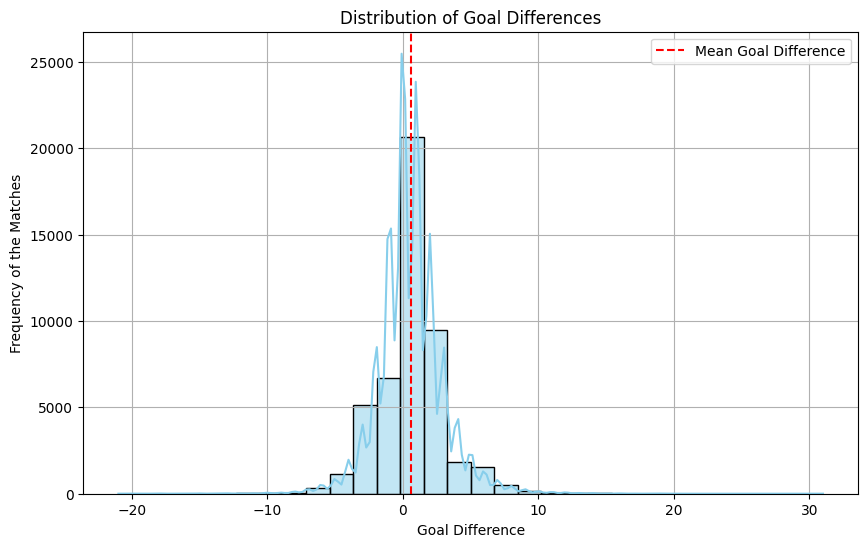

In [11]:
results_df['goal_difference'] = results_df['home_score'] - results_df['away_score']
t_stat, p_value = ttest_1samp(results_df['goal_difference'], 0) # Using one sample T-test
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Rejecting the null hypothesis: The average goal difference is significantly different from zero.")
else:
    print("Failure to reject the null hypothesis: The average goal difference is not significantly different from zero.")

plt.figure(figsize=(10, 6))
sns.histplot(results_df['goal_difference'], bins=30, kde=True, color='skyblue')
plt.axvline(results_df['goal_difference'].mean(), color='red', linestyle='--', label='Mean Goal Difference')
plt.title('Distribution of Goal Differences')
plt.xlabel('Goal Difference')
plt.ylabel('Frequency of the Matches')
plt.legend()
plt.grid(True)
plt.show()

###Conclusion 2
Hypothesis: The mean goals scored for each tournament differs from tournament to tournament.

Null Hypothesis (H0) : All tournaments have equal mean goals scored

Alternative Hypothesis (H1) :
At least two tournaments have different mean goals scored

The statistical method we will be using is : ANOVA Test

When to use the ANOVA Test : We use this test to compare the means of three or more groups to determine if there is a significant difference between at least two of them. It helps identify whether variations in data are due to actual differences among groups or just random chance.

Why are we using it here : In this analysis, ANOVA is applied to test if the average number of goals scored per match varies significantly across different tournaments, such as Friendly matches, FIFA World Cup, UEFA qualifiers, and others. This allows us to evaluate whether certain tournaments are more goal-intensive than others.

ANOVA Test : https://www.javatpoint.com/anova-test-in-python

Null Hypothesis (H₀): All tournaments have equal mean goals scored

Alternative Hypothesis (H₁): At least two tournaments have different mean goals scored



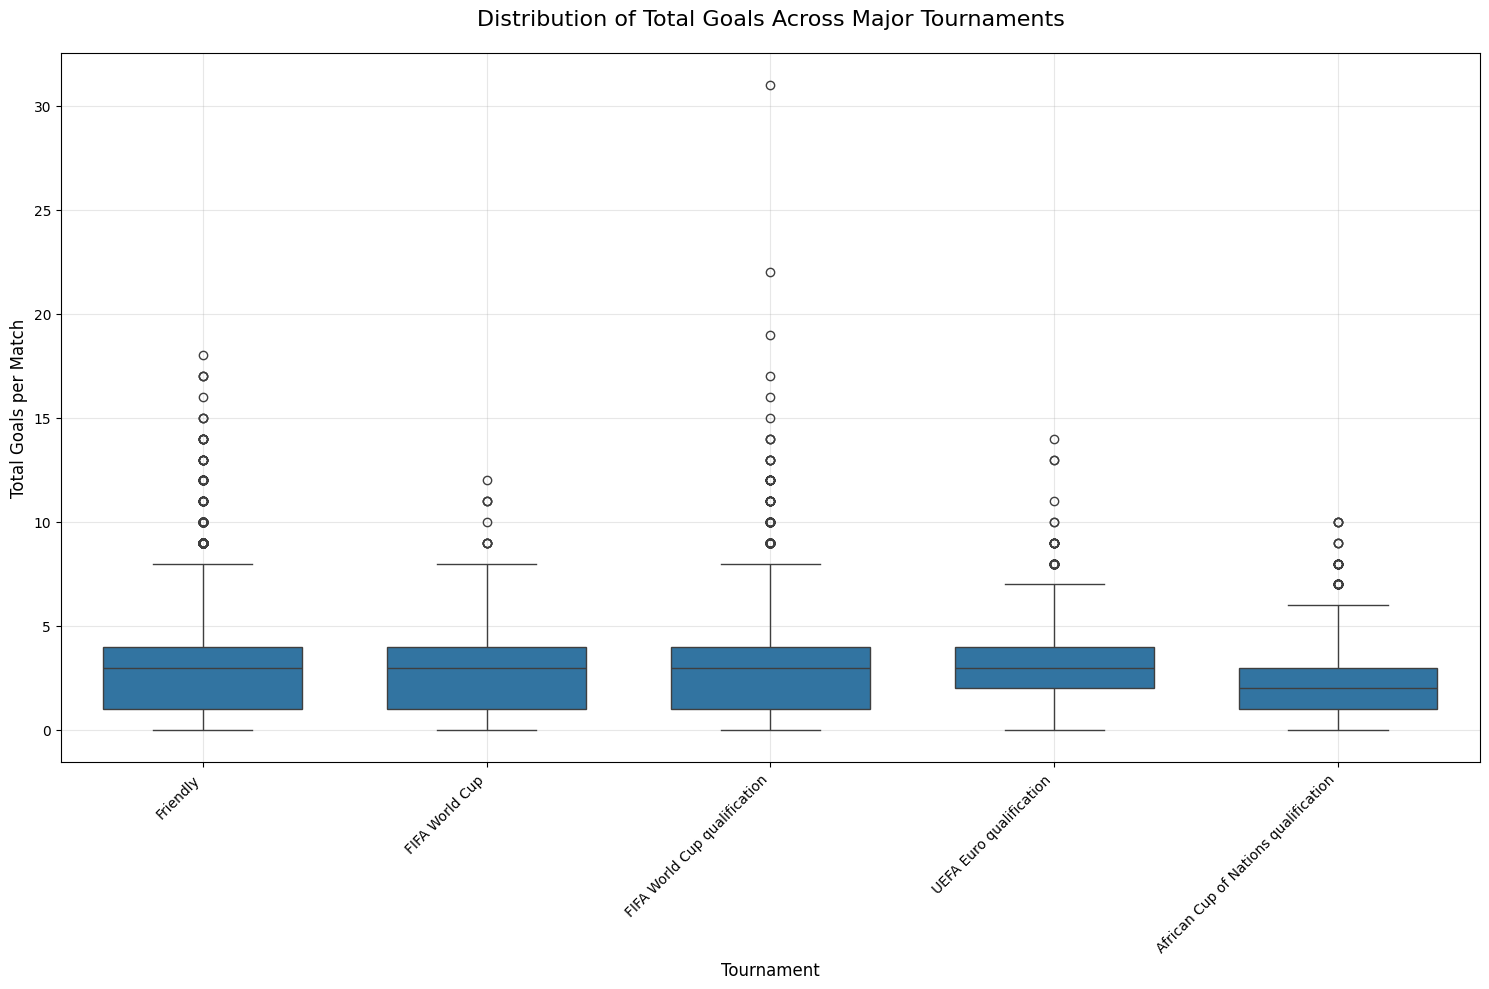


One-way ANOVA Results:
p-value: 7.480390008901092e-24

Conclusion:
Reject the null hypothesis: At least two tournaments have different mean goals scored, to determine which ones, post hoc tests can be used.


In [12]:
top_tournaments = results_df['tournament'].value_counts().head(5).index
tournament_data = results_df[results_df['tournament'].isin(top_tournaments)]


tournament_groups = [group['total_goals'].values for name, group in tournament_data.groupby('tournament')]
x, p_value = stats.f_oneway(*tournament_groups)


plt.figure(figsize=(15, 10))


sns.boxplot(data=tournament_data, x='tournament', y='total_goals', width=0.7)

plt.title('Distribution of Total Goals Across Major Tournaments',
          fontsize=16, pad=20)
plt.xlabel('Tournament', fontsize=12)
plt.ylabel('Total Goals per Match', fontsize=12)
plt.xticks(rotation=45, ha='right')

print('Null Hypothesis (H₀): All tournaments have equal mean goals scored\n')
print('Alternative Hypothesis (H₁): At least two tournaments have different mean goals scored\n')

plt.grid(True, alpha=0.3)
sns.set_style("whitegrid")
plt.tight_layout()

plt.show()


print("\nOne-way ANOVA Results:")
print(f"p-value: {p_value}")
print("\nConclusion:")
if p_value < 0.05:
    print("Reject the null hypothesis: At least two tournaments have different mean goals scored, to determine which ones, post hoc tests can be used.")
else:
    print("Fail to reject the null hypothesis, no significant difference in mean goals scored between tournaments.")

###Conclusion 3
Hypothesis: The type of tournament and match result are dependent on each other as there is a significance in type of tournament played vs match result.

Null Hypothesis (H0): The type of tournament and the match result are independent.


Alternate Hypothesis (H1): The type of tournament and the match result are not independent.


The statistical method we will be using is : Chi-Squared Test

When to Use the Chi-Squared Test : The test is used to examine the relationship between two categorical variables by comparing observed frequencies with expected frequencies under the assumption of independence.

Why are we using it here: We want to test if the type of tournament (e.g., FIFA World Cup, UEFA qualifiers) is associated with match results (home win, away win, or draw). This helps determine whether the tournament type influences match outcomes or if they are independent.

Chi-Squared Test : https://www.geeksforgeeks.org/python-pearsons-chi-square-test/

Contingency Table:
result                           away_win  draw  home_win
tournament                                               
ABCS Tournament                         5     5        10
AFC Asian Cup                         126   100       195
AFC Asian Cup qualification           189   128       453
AFC Challenge Cup                      37    20        43
AFC Challenge Cup qualification        22    18        52
...                                   ...   ...       ...
WAFF Championship                      36    29        49
West African Cup                       16    17        21
Windward Islands Tournament            33    25        43
World Unity Cup                         3     0         0
Évence Coppée Trophy                    0     1         0

[176 rows x 3 columns]
Null Hypothesis (H0): The type of tournament and the match result are independent.
Alternate Hypothesis (H1): The type of tournament and the match result are not independent.
P-Value: 3.436338605539785e-

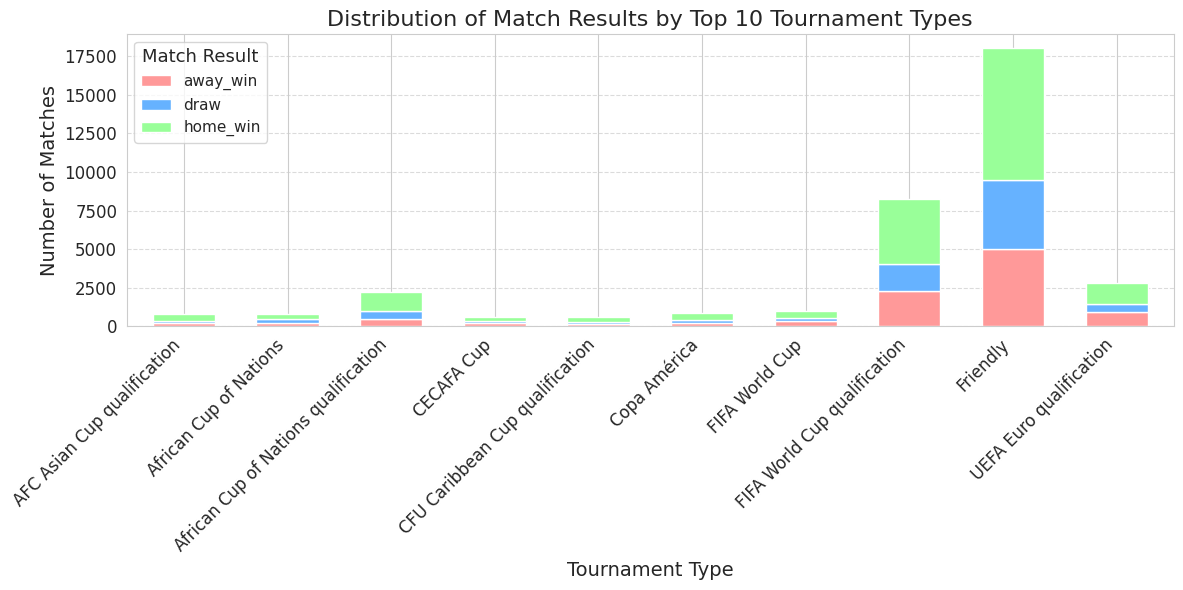

In [13]:
# function for match result
def get_result(row):
   if row['home_score'] > row['away_score']:
       return 'home_win'
   elif row['home_score'] < row['away_score']:
       return 'away_win'
   else:
       return 'draw'

# making result column
results_df['result'] = results_df.apply(get_result, axis=1)

# chi squared test and visualization
contingency_table = pd.crosstab(results_df['tournament'], results_df['result'])

#  contingency table
print("Contingency Table:")
print(contingency_table)

# Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# the hypotheses
print("Null Hypothesis (H0): The type of tournament and the match result are independent.")
print("Alternate Hypothesis (H1): The type of tournament and the match result are not independent.")

# Output the Chi-Square test results
print(f"P-Value: {p}")


#  rule based on p-value
alpha = 0.05  # significance level
if p < alpha:
    print("\nConclusion: Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("There is evidence to suggest that the type of tournament and match result are associated.")
else:
    print("\nConclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis.")
    print("There is no sufficient evidence to suggest that the type of tournament and match result are associated.")

# Filter tournaments
top_tournaments = results_df['tournament'].value_counts().nlargest(10).index
filtered_df = results_df[results_df['tournament'].isin(top_tournaments)]

# new contingency table with filtered tournament types
contingency_table_filtered = pd.crosstab(filtered_df['tournament'], filtered_df['result'])

#  a stacked bar plot for the filtered contingency table
contingency_table_filtered.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.6, color=['#FF9999', '#66B2FF', '#99FF99'])

# display
plt.title('Distribution of Match Results by Top 10 Tournament Types', fontsize=16)
plt.xlabel('Tournament Type', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Match Result', title_fontsize=13, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display
plt.tight_layout()
plt.show()

## Primary Analysis



We chose logistic regression based on the exploratory analysis due to several reasons stated below:
1. Binary Classification Task : The exploratory analysis revealed that our primary goal was to predict binary outcomes such as win or loss. Logistic regression is explicitly designed for such tasks, as it models the probability of a class occurring, making it a natural choice for this project.
2. Linear Relationships in Features : Exploratory visualizations and correlations showed linear trends between key numerical features (e.g., goal difference, shots on target) and the target variable. Logistic regression excels at capturing these relationships between predictors and the log-odds of the target variable.
3. Interpretability of Features : From the exploratory analysis:

	 •	Features such as home advantage and team ranking were identified as significant drivers of match outcomes.
   
	 •	Logistic regression provides interpretable coefficients, allowing us to understand the influence of these features on the likelihood of specific results, aligning with our goal of uncovering actionable insights.
4. Simplicity Matched the Dataset : The dataset appeared well-structured, with manageable dimensionality and no excessive noise. This made logistic regression’s simplicity and robustness ideal for leveraging these characteristics.
5. Class Separation Observed : Scatter plots and pair plots in the exploratory analysis showed some degree of class separation (e.g., higher goal difference indicating a higher likelihood of winning). Logistic regression was well-suited to model this behavior efficiently.

We'll develop a machine learning model to predict football match outcomes. Our goal is to determine whether we can use historical data and team statistics to predict which team will win in a penalty shootout. This type of analysis has important implications for sports analysts, team strategists, and potentially even bookmakers.

First, we need to establish the necessary libraries for our analysis. We'll be using several key Python packages, as highlighted earlier:

- pandas and numpy for data manipulation
- matplotlib and seaborn for visualization
- scikit-learn for our machine learning components
Since we already completed the imports above, no need to repeat this again

#### Calculating Team Historical Performance


Before we can build our prediction model, we need to understand how teams perform historically. In football, teams often perform differently when playing at home versus away. To capture this, we'll calculate several metrics for each team:

1. Average scoring when playing at home
2. Average scoring when playing away
3. Average goals conceded in each situation
4. Overall scoring tendencies

This calculation will give us a comprehensive view of each team's performance characteristics:

In [14]:
# Calculate average metrics for home performance
home_stats = results_df.groupby('home_team').agg({
    'home_score': 'mean',  # Average goals scored at home
    'away_score': 'mean',  # Average goals conceded at home
    'total_goals': 'mean'  # Average total goals in home games
}).reset_index()

# Calculate same metrics for away performance
away_stats = results_df.groupby('away_team').agg({
    'home_score': 'mean',  # Average goals conceded away
    'away_score': 'mean',  # Average goals scored away
    'total_goals': 'mean'  # Average total goals in away games
}).reset_index()

# Rename columns to be more descriptive
home_stats.columns = ['team', 'avg_home_score', 'avg_conceded_home', 'avg_total_home']
away_stats.columns = ['team', 'avg_conceded_away', 'avg_away_score', 'avg_total_away']

####Creating the Master Dataset
Now that we have our performance metrics, we need to combine them with our match data. This process involves several steps:

1. Merging home and away statistics with our match data
2. Calculating additional features that might be predictive
3. Creating our target variable (who won the shootout)

In [15]:
model_data = pd.merge(shootouts_df, home_stats,
                     left_on='home_team',
                     right_on='team',
                     how='left')

# Second merge - add away team statistics
model_data = pd.merge(model_data, away_stats,
                     left_on='away_team',
                     right_on='team',
                     how='left',
                     suffixes=('_home', '_away'))

# Clean up the merged data
model_data = model_data.drop(['team_home', 'team_away'], axis=1)
model_data = model_data.dropna()  # Remove any rows with missing data

# Calculate difference-based features
model_data['score_diff'] = model_data['avg_home_score'] - model_data['avg_away_score']
model_data['total_goals_diff'] = model_data['avg_total_home'] - model_data['avg_total_away']

# Create binary target variable (1 for home win, 0 for away win)
model_data['shootout_winner'] = (model_data['winner'] == model_data['home_team']).astype(int)

These difference-based features are particularly important because they capture the relative strength between the two teams. For example, a positive score_diff indicates that the home team tends to score more goals than the away team.

####Model Development
For our prediction task, we've chosen logistic regression for several reasons:

1. Binary outcome (win/loss) matches perfectly with logistic regression's design
2. We want interpretable results that can tell us which factors matter most
3. The relationship between goals scored and winning probability is naturally logistic
4. We have sufficient data for a robust fit

Learn more about logistic regression here: https://www.geeksforgeeks.org/understanding-logistic-regression/

Let's prepare our features and split our data:

In [16]:
# Define our feature set
features = [
    'avg_home_score', 'avg_away_score',
    'avg_conceded_home', 'avg_conceded_away',
    'avg_total_home', 'avg_total_away',
    'score_diff', 'total_goals_diff'
]

# Split into features (X) and target (y)
X = model_data[features]
y = model_data['shootout_winner']

# Create training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Now we can train our model and evaluate its performance:


In [17]:
# Initialize and train the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Generate predictions
y_pred = logistic_model.predict(X_test)

# Calculate key metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Performance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

Model Performance Metrics:
Accuracy: 0.479
Precision: 0.472
Recall: 0.837


From here, we can now move on to the visualizations and analysis.

##Data Visualization

To understand our model's performance and insights, we'll create several visualizations. Each one reveals different aspects of our model and the patterns it has discovered.

####1. Confusion Matrix

The confusion matrix helps us understand where our model succeeds and fails:

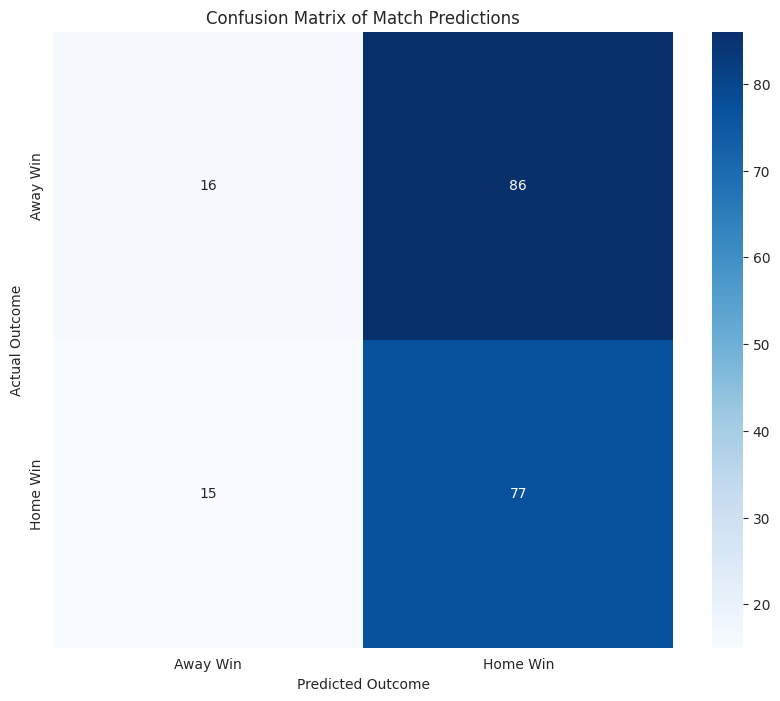

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Away Win', 'Home Win'],
            yticklabels=['Away Win', 'Home Win'])
plt.title('Confusion Matrix of Match Predictions')
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.show()

This visualization shows us:

- True positives (correctly predicted home wins)
- True negatives (correctly predicted away wins)
- False positives (incorrectly predicted home wins)
- False negatives (incorrectly predicted away wins)



####2. Feature Importance Analysis

Understanding which factors most strongly influence the outcome is crucial:

<ipython-input-19-bd8e61ffab4d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')


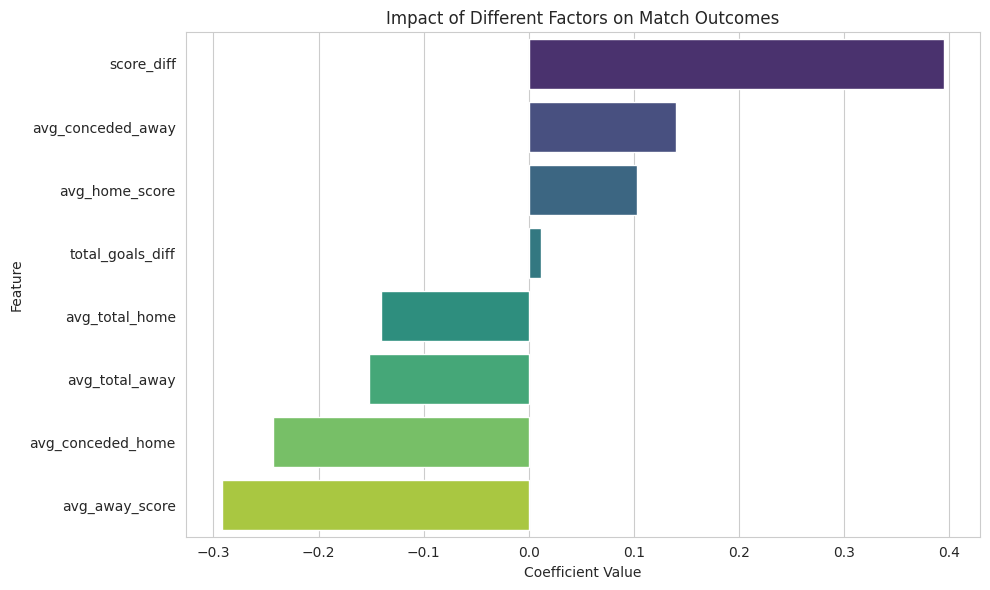

In [19]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': logistic_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='viridis')
plt.title('Impact of Different Factors on Match Outcomes')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The coefficient values tell us:

- Positive values indicate factors that increase home win probability
- Negative values indicate factors that increase away win probability
- The magnitude shows how strongly each factor influences the outcome

3. Probability Analysis
Finally, let's examine how historical performance relates to win probability:

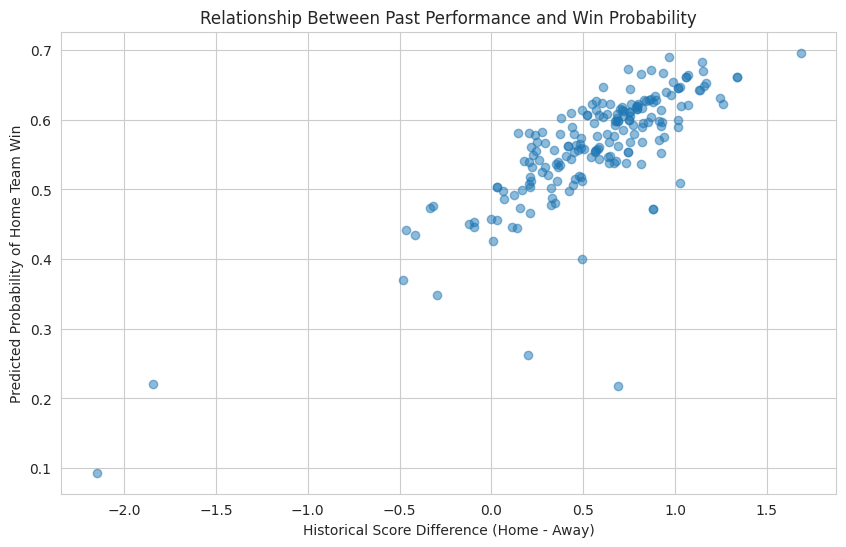

In [20]:
plt.figure(figsize=(10, 6))
probabilities = logistic_model.predict_proba(X_test)
score_diffs = X_test['score_diff']
plt.scatter(score_diffs, probabilities[:, 1], alpha=0.5)
plt.xlabel('Historical Score Difference (Home - Away)')
plt.ylabel('Predicted Probability of Home Team Win')
plt.title('Relationship Between Past Performance and Win Probability')
plt.grid(True)
plt.show()

This scatter plot reveals:

- The relationship between historical performance and win probability
- Any potential non-linear patterns in the relationship
- The range of probabilities our model assigns

## Insights and Conclusion

This project successfully demonstrated the use of machine learning to predict football match outcomes based on historical performance and team statistics. By leveraging logistic regression, we achieved valuable insights into the factors that influence a team's likelihood of winning a penalty shootout. Below are the key findings and conclusions drawn from the analysis:

#### Insights:
1. **Confusion Matrix Analysis:**
   - The confusion matrix revealed that while the model correctly predicted 77 home wins, it struggled with away wins, misclassifying 86 matches. This indicates that the model may have a bias toward predicting home wins, likely due to stronger performance metrics associated with home teams.
   - The model's ability to classify outcomes correctly for away teams needs improvement, as indicated by the high false-positive rate for home wins.

2. **Feature Importance:**
   - The feature analysis showed that the historical score difference (`score_diff`) had the highest positive impact on the probability of a home win. This emphasizes that teams with a stronger scoring history at home are significantly more likely to succeed.
   - Conversely, factors like `avg_away_score` and `avg_conceded_home` negatively influenced the probability of a home win, highlighting the importance of strong away performance and defensive capabilities for away teams.
   - Other metrics such as `total_goals_diff` and `avg_total_home` had a moderate impact, suggesting that overall scoring tendencies also play a role.

3. **Probability Analysis:**
   - The scatter plot of historical score differences against predicted probabilities showed a clear positive correlation. Teams with higher historical score differences were more likely to have higher probabilities of winning.
   - This validates the model's ability to generalize key patterns between historical performance and match outcomes, though there are some outliers that warrant further exploration.

4. **Model Performance:**
   - The logistic regression model achieved a recall score of 0.837, demonstrating its effectiveness in capturing true positives (home wins). However, the overall accuracy (0.479) and precision (0.472) indicate room for improvement in predicting away wins and reducing false positives.

#### Conclusion:
This analysis underscores the potential of using historical data and team statistics to predict match outcomes, particularly for home wins. The strong performance of the `score_diff` feature highlights the importance of past scoring tendencies in influencing outcomes. However, the model's lower precision and accuracy suggest that additional features, such as player statistics, recent form, or team injuries, could enhance prediction performance.

For sports analysts and team strategists, this approach provides a data-driven framework for decision-making, such as optimizing strategies for away matches or evaluating key metrics for success. Future work could explore advanced machine learning models, such as random forests or neural networks, and include richer datasets to refine the predictions further.

Overall, this project demonstrates the value of combining statistical analysis with machine learning to gain actionable insights into sports outcomes, paving the way for applications in performance optimization, betting strategies, and fan engagement.
